In [2]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model



In [3]:
import sklearn

In [10]:
IMG_SIZE = 224                            

train_dir="../data/classification_dataset/train"

val_dir="../data/classification_dataset/valid"
 
train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode="binary"
)

val_data = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode="binary"
)
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

train_data = train_data.map(
    lambda x, y: (data_augmentation(x, training=True), y)
)




Found 2662 files belonging to 2 classes.
Found 442 files belonging to 2 classes.


In [4]:
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False 


In [5]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=output)


In [7]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [12]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


Epoch 1/10
84/84 [==============================] - 22s 249ms/step - loss: 0.6834 - accuracy: 0.6157 - val_loss: 0.5154 - val_accuracy: 0.7421
Epoch 2/10
84/84 [==============================] - 21s 246ms/step - loss: 0.5319 - accuracy: 0.7295 - val_loss: 0.4721 - val_accuracy: 0.7398
Epoch 3/10
84/84 [==============================] - 20s 240ms/step - loss: 0.4838 - accuracy: 0.7667 - val_loss: 0.4477 - val_accuracy: 0.7738
Epoch 4/10
84/84 [==============================] - 21s 253ms/step - loss: 0.4528 - accuracy: 0.7829 - val_loss: 0.4351 - val_accuracy: 0.7783
Epoch 5/10
84/84 [==============================] - 22s 263ms/step - loss: 0.4267 - accuracy: 0.8035 - val_loss: 0.4183 - val_accuracy: 0.7828
Epoch 6/10
84/84 [==============================] - 22s 262ms/step - loss: 0.4124 - accuracy: 0.8073 - val_loss: 0.4016 - val_accuracy: 0.7986
Epoch 7/10
84/84 [==============================] - 23s 272ms/step - loss: 0.3917 - accuracy: 0.8208 - val_loss: 0.3948 - val_accuracy: 0.8009

In [14]:
base_model.trainable = True

for layer in base_model.layers[:-30]:
    layer.trainable = False


In [16]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [18]:
history_fine = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


Epoch 1/10
84/84 [==============================] - 28s 324ms/step - loss: 0.6244 - accuracy: 0.7194 - val_loss: 0.4065 - val_accuracy: 0.8054
Epoch 2/10
84/84 [==============================] - 29s 341ms/step - loss: 0.4334 - accuracy: 0.7919 - val_loss: 0.4295 - val_accuracy: 0.8009
Epoch 3/10
84/84 [==============================] - 30s 352ms/step - loss: 0.3975 - accuracy: 0.8197 - val_loss: 0.4490 - val_accuracy: 0.7760
Epoch 4/10
84/84 [==============================] - 29s 347ms/step - loss: 0.3643 - accuracy: 0.8332 - val_loss: 0.4867 - val_accuracy: 0.7534
Epoch 5/10
84/84 [==============================] - 30s 360ms/step - loss: 0.3465 - accuracy: 0.8561 - val_loss: 0.4869 - val_accuracy: 0.7579
Epoch 6/10
84/84 [==============================] - 31s 369ms/step - loss: 0.3059 - accuracy: 0.8614 - val_loss: 0.4694 - val_accuracy: 0.7715
Epoch 7/10
84/84 [==============================] - 30s 357ms/step - loss: 0.3206 - accuracy: 0.8591 - val_loss: 0.4470 - val_accuracy: 0.7783

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
y_true = []
y_pred = []

for images, labels in val_data:
    preds = model.predict(images)
    preds = (preds > 0.5).astype(int)  # threshold
    y_true.extend(labels.numpy())
    y_pred.extend(preds.flatten())


1/1 [==============================] - 0s 408ms/step


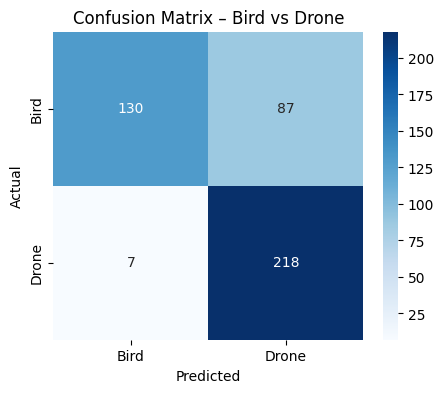

In [22]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Bird", "Drone"],
    yticklabels=["Bird", "Drone"]
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Bird vs Drone")
plt.show()


In [26]:
model.save("bird_drone_mobilenetv2.h5")

/opt/anaconda3/envs/tf_cpu/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
raw_train = tf.keras.utils.image_dataset_from_directory(
    "../data/classification_dataset/train",        # same path you used
    image_size=(160,160),
    batch_size=32,
    label_mode="binary"
)

CLASS_NAMES = raw_train.class_names
print("Class order:", CLASS_NAMES)




Found 2662 files belonging to 2 classes.
Class order: ['bird', 'drone']
